In [ ]:
#! pip install --upgrade pip
#!pip install pystan==2.19.1.1 convertdate prophet

In [ ]:
import pandas as pd
import os
import tqdm as tq
import string
import statistics as stats
import re
pd.set_option('display.max_columns', None) # allows to display all columns of a large dataframe
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv('/work/Prophet testing/crimes_and_features.csv')
df = df.loc[df['MSOA code'] == 'E02000001']
df

,Unnamed: 0,Month,MSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,Sum crimes,Median Age,life_exp_m,life_exp_f,life_exp_m65,life_exp_f_65,energy_eff_score,Total annual income
0,0,2015-01,E02000001,102.0,18.0,13.0,21.0,49.0,13.0,142.0,2.0,18.0,7.0,53.0,48.0,12.0,76.0,574,38.15,90.37,90.74,90.74,27.61,72,65400
12602,12602,2015-02,E02000001,91.0,22.0,22.0,22.0,21.0,14.0,141.0,1.0,31.0,1.0,67.0,47.0,10.0,77.0,567,38.15,90.37,90.74,90.74,27.61,72,65400
19803,19803,2015-03,E02000001,96.0,25.0,22.0,14.0,25.0,16.0,168.0,5.0,29.0,2.0,57.0,54.0,8.0,91.0,612,38.15,90.37,90.74,90.74,27.61,72,65400
26409,26409,2015-04,E02000001,73.0,34.0,33.0,18.0,41.0,10.0,125.0,5.0,25.0,6.0,74.0,65.0,8.0,88.0,605,38.15,90.37,90.74,90.74,27.61,72,65400
33609,33609,2015-05,E02000001,81.0,24.0,29.0,13.0,27.0,15.0,129.0,1.0,30.0,5.0,78.0,56.0,17.0,78.0,583,38.15,90.37,90.74,90.74,27.61,72,65400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559467,559467,2021-06,E02000001,101.0,21.0,14.0,29.0,52.0,9.0,67.0,6.0,73.0,11.0,69.0,54.0,20.0,111.0,637,38.15,90.37,90.74,90.74,27.61,72,65400
563317,563317,2021-07,E02000001,111.0,28.0,21.0,30.0,50.0,10.0,94.0,4.0,70.0,16.0,80.0,101.0,15.0,133.0,763,38.15,90.37,90.74,90.74,27.61,72,65400
575050,575050,2021-08,E02000001,77.0,33.0,24.0,36.0,50.0,7.0,124.0,4.0,58.0,13.0,77.0,103.0,23.0,120.0,749,38.15,90.37,90.74,90.74,27.61,72,65400
581244,581244,2021-09,E02000001,97.0,57.0,27.0,25.0,51.0,4.0,153.0,5.0,60.0,21.0,76.0,106.0,31.0,138.0,851,38.15,90.37,90.74,90.74,27.61,72,65400


In [ ]:
df2 = df[['Month', 'Sum crimes']]

df2 = df2.rename(columns={"Month":"ds"})
df2 = df2.rename(columns={"Sum crimes":'y'})
df2.astype({'ds': 'datetime64'}).dtypes
df2


,ds,y
0,2015-01,574
12602,2015-02,567
19803,2015-03,612
26409,2015-04,605
33609,2015-05,583
...,...,...
559467,2021-06,637
563317,2021-07,763
575050,2021-08,749
581244,2021-09,851


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


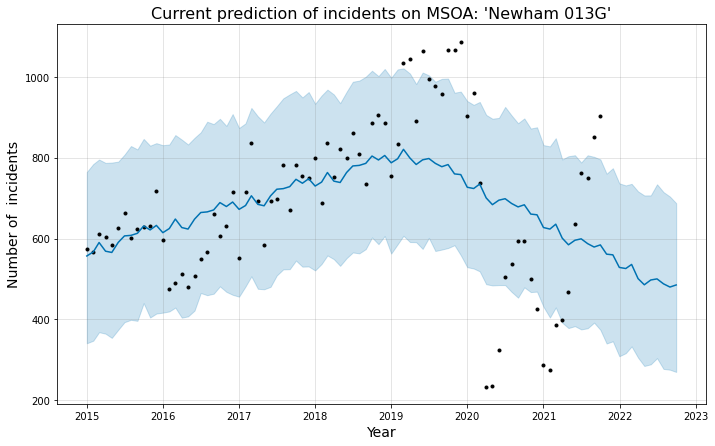

In [ ]:
m = Prophet(yearly_seasonality =True, changepoint_prior_scale= 0.1, seasonality_prior_scale= 0.01, seasonality_mode= 'additive', holidays_prior_scale= 0.01)
m.fit(df2)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

fig1 = m.plot(forecast)
ax = fig1.gca()
ax.set_title("Current prediction of incidents on MSOA: 'Newham 013G'", size=16)
ax.set_xlabel("Year", size=14)
ax.set_ylabel("Number of  incidents", size=14);

In [ ]:
# Initial training period.
initial= 30*70
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period = 30
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 61
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period, 
horizon=horizon)
# Performance Metrics of fb_cv

INFO:prophet:Making 11 forecasts with cutoffs between 2020-10-05 00:00:00 and 2021-08-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:08<01:21,  8.18s/it]

 18%|█▊        | 2/11 [00:17<01:20,  8.97s/it]

  9%|▉         | 1/11 [06:41<1:06:59, 401.91s/it]


 36%|███▋      | 4/11 [00:36<01:05,  9.33s/it]

 45%|████▌     | 5/11 [00:44<00:53,  8.94s/it]

 55%|█████▍    | 6/11 [00:53<00:44,  8.97s/it]

 64%|██████▎   | 7/11 [01:05<00:38,  9.72s/it]

 73%|███████▎  | 8/11 [01:15<00:29,  9.79s/it]

 82%|████████▏ | 9/11 [01:25<00:19,  9.88s/it]

 91%|█████████ | 10/11 [01:34<00:09,  9.72s/it]

100%|██████████| 11/11 [01:43<00:00,  9.44s/it]


In [ ]:
evaluation = performance_metrics(fb_cv, monthly =True, rolling_window=0.1)
evaluation

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1,61180.987280,247.347907,217.764285,0.426339,0.418061,0.432532,0.363636
1,2,95665.041417,309.297658,279.413351,0.514551,0.513275,0.543133,0.181818


In [ ]:
fb_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-11-01,1024.962489,954.178921,1094.138438,1066,2019-10-07
1,2019-12-01,1055.319726,987.614021,1123.777013,1087,2019-10-07
2,2020-01-01,1004.418194,929.100652,1077.610784,903,2019-10-07
3,2020-02-01,1013.545408,939.084735,1080.561584,960,2019-10-07
4,2020-03-01,1094.304152,1018.091101,1166.781404,738,2019-10-07
...,...,...,...,...,...,...
151,2021-06-01,554.862822,378.031994,726.166163,637,2020-10-01
152,2021-07-01,554.260063,356.412293,739.847600,763,2020-10-01
153,2021-08-01,539.102284,357.992906,718.761140,749,2020-10-01
154,2021-09-01,521.828622,347.671396,694.816698,851,2020-10-01


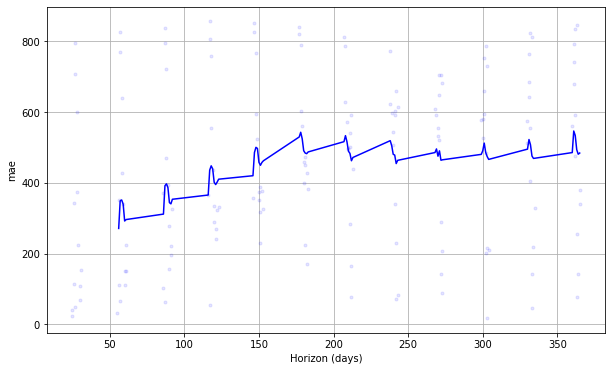

In [ ]:
fig = plot_cross_validation_metric(fb_cv, metric='mae')

In [ ]:
#Splitting train and test
train = df2[df2['ds'] <= '2020-10']
test = df2[df2['ds'] > '2020-10']
test

,ds,y
507325,2020-11,500
514358,2020-12,426
523643,2021-01,287
527267,2021-02,274
534772,2021-03,385
545059,2021-04,398
547276,2021-05,468
559467,2021-06,637
563317,2021-07,763
575050,2021-08,749


In [ ]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
77,2021-05-31
78,2021-06-30
79,2021-07-31
80,2021-08-31
81,2021-09-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2021-05-31,839.672259,615.695478,1070.774836
78,2021-06-30,771.788933,576.407367,981.137050
79,2021-07-31,760.376563,561.712870,960.890399
80,2021-08-31,765.997784,553.198937,966.304558
81,2021-09-30,1017.860542,803.915596,1226.147493


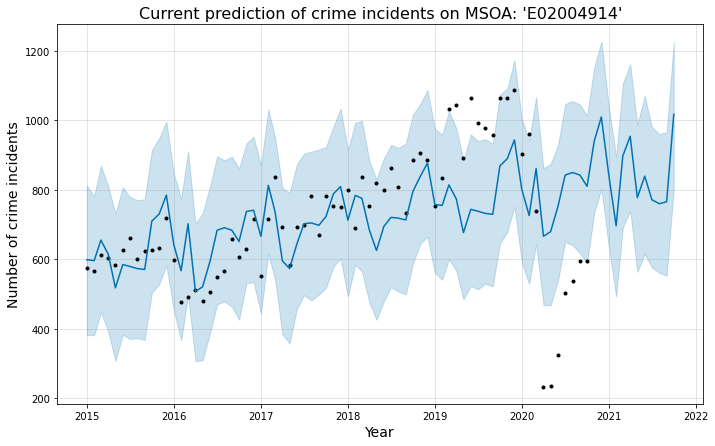

In [ ]:
fig1 = m.plot(forecast, uncertainty=True)
ax = fig1.gca()
ax.set_title("Current prediction of crime incidents on MSOA: 'E02004914'", size=16)
ax.set_xlabel("Year", size=14)
ax.set_ylabel("Number of crime incidents", size=14);

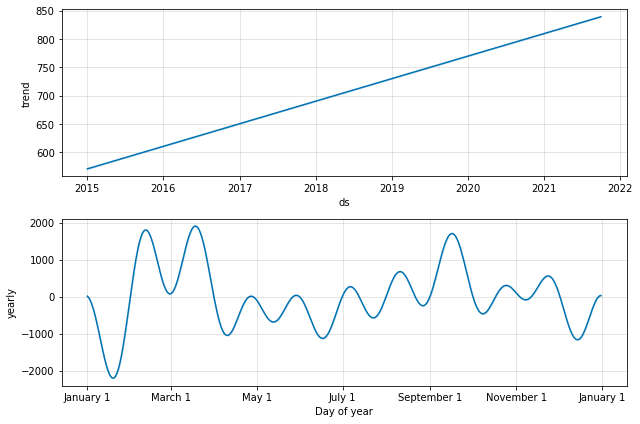

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,571.137397,382.391681,813.080260,571.137397,571.137397,27.997918,27.997918,27.997918,27.997918,27.997918,27.997918,0.0,0.0,0.0,599.135315
1,2015-02-01,574.510845,381.842793,781.772228,574.510845,574.510845,22.055933,22.055933,22.055933,22.055933,22.055933,22.055933,0.0,0.0,0.0,596.566778
2,2015-03-01,577.557831,447.874592,869.419677,577.557831,577.557831,78.057337,78.057337,78.057337,78.057337,78.057337,78.057337,0.0,0.0,0.0,655.615168
3,2015-04-01,580.931279,392.803506,810.869699,580.931279,580.931279,34.314878,34.314878,34.314878,34.314878,34.314878,34.314878,0.0,0.0,0.0,615.246157
4,2015-05-01,584.195906,307.081854,731.201379,584.195906,584.195906,-66.027907,-66.027907,-66.027907,-66.027907,-66.027907,-66.027907,0.0,0.0,0.0,518.167999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2021-05-31,825.828523,615.695478,1070.774836,825.826384,825.830840,13.843736,13.843736,13.843736,13.843736,13.843736,13.843736,0.0,0.0,0.0,839.672259
78,2021-06-30,829.088270,576.407367,981.137050,829.085655,829.091101,-57.299337,-57.299337,-57.299337,-57.299337,-57.299337,-57.299337,0.0,0.0,0.0,771.788933
79,2021-07-31,832.456676,561.712870,960.890399,832.453567,832.460031,-72.080113,-72.080113,-72.080113,-72.080113,-72.080113,-72.080113,0.0,0.0,0.0,760.376563
80,2021-08-31,835.825081,553.198937,966.304558,835.821541,835.829091,-69.827297,-69.827297,-69.827297,-69.827297,-69.827297,-69.827297,0.0,0.0,0.0,765.997784


In [ ]:
df_train = df[df['Month'] <= '2020-10']
df_test = df[df['Month'] > '2020-10']
df_test

,Unnamed: 0,Month,MSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,Sum crimes,Median Age,life_exp_m,life_exp_f,life_exp_m65,life_exp_f_65,energy_eff_score,Total annual income
507325,507325,2020-11,E02000001,83.0,47.0,6.0,12.0,57.0,7.0,45.0,4.0,34.0,17.0,66.0,61.0,10.0,51.0,500,38.15,90.37,90.74,90.74,27.61,72,65400
514358,514358,2020-12,E02000001,71.0,14.0,11.0,24.0,49.0,9.0,48.0,5.0,26.0,10.0,50.0,35.0,13.0,61.0,426,38.15,90.37,90.74,90.74,27.61,72,65400
523643,523643,2021-01,E02000001,65.0,6.0,6.0,10.0,30.0,4.0,27.0,1.0,21.0,3.0,38.0,17.0,7.0,52.0,287,38.15,90.37,90.74,90.74,27.61,72,65400
527267,527267,2021-02,E02000001,60.0,6.0,6.0,10.0,29.0,7.0,12.0,4.0,20.0,9.0,31.0,33.0,8.0,39.0,274,38.15,90.37,90.74,90.74,27.61,72,65400
534772,534772,2021-03,E02000001,62.0,11.0,7.0,19.0,54.0,8.0,20.0,3.0,47.0,3.0,39.0,28.0,13.0,71.0,385,38.15,90.37,90.74,90.74,27.61,72,65400
545059,545059,2021-04,E02000001,71.0,25.0,16.0,16.0,43.0,2.0,33.0,2.0,31.0,15.0,43.0,35.0,7.0,59.0,398,38.15,90.37,90.74,90.74,27.61,72,65400
547276,547276,2021-05,E02000001,79.0,26.0,14.0,10.0,44.0,4.0,55.0,3.0,34.0,8.0,47.0,69.0,12.0,63.0,468,38.15,90.37,90.74,90.74,27.61,72,65400
559467,559467,2021-06,E02000001,101.0,21.0,14.0,29.0,52.0,9.0,67.0,6.0,73.0,11.0,69.0,54.0,20.0,111.0,637,38.15,90.37,90.74,90.74,27.61,72,65400
563317,563317,2021-07,E02000001,111.0,28.0,21.0,30.0,50.0,10.0,94.0,4.0,70.0,16.0,80.0,101.0,15.0,133.0,763,38.15,90.37,90.74,90.74,27.61,72,65400
575050,575050,2021-08,E02000001,77.0,33.0,24.0,36.0,50.0,7.0,124.0,4.0,58.0,13.0,77.0,103.0,23.0,120.0,749,38.15,90.37,90.74,90.74,27.61,72,65400


In [ ]:
#This loops over every crime type in the dataset and makes seperate predicitons about the amount of that type
#one year ahead of time, per month and prints a forecasting figure as result
i = 3
forecasts = []
crime_types = []
while i<=17: #replace 3 by once dataset implemented df.count(axis='columns')
     

    df_train2 = df_train.iloc[:, [1, i]]
    crime_type = df_train2.columns.values[1]
    df_train2.columns.values[0] = "ds"
    df_train2.columns.values[1] = "y"
    df_train2.astype({'ds': 'datetime64[ns]'}).dtypes
    crime_types.append(crime_type)
    m = Prophet()
    m.fit(df_train2)

    future = m.make_future_dataframe(periods=12, freq='M')

    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    forecasts.append(forecast)
    print(len(forecast))

    fig1 = m.plot(forecast)
    ax = fig1.gca()
    ax.set_title("Current prediction of " + crime_type + " incidents on MSOA: 'Newham 013G'", size=16)
    ax.set_xlabel("Year", size=14)
    ax.set_ylabel("Number of " + crime_type + " incidents", size=14);
    i +=1


NameError: name 'df_train' is not defined

In [ ]:
j=0
while j < len(forecasts):
    i=0
    error = []
    forecast = forecasts[j]
    while i<len(test):
        x = forecast.iloc[i]["trend"]
        y = df_test.iloc[i][j+3]
        error.append(abs(y-x))
        i += 1
    MAE = sum(error)/len(error)
    print("MAE for", crime_types[j] ,"is", MAE)
    j +=1

MAE for Crime type_Anti-social behaviour is 21.33656473650429
MAE for Crime type_Bicycle theft is 12.131298391012892
MAE for Crime type_Burglary is 7.844469864734826
MAE for Crime type_Criminal damage and arson is 9.235142601665617
MAE for Crime type_Drugs is 23.96344006828116
MAE for Crime type_Other crime is 7.82171627020676
MAE for Crime type_Other theft is 71.24042786713359
MAE for Crime type_Possession of weapons is 1.8393175216244293
MAE for Crime type_Public order is 21.225310020389458
MAE for Crime type_Robbery is 8.2391090647032
MAE for Crime type_Shoplifting is 15.951258446485012
MAE for Crime type_Theft from the person is 28.255615585604783
MAE for Crime type_Vehicle crime is 4.702081070097003
MAE for Crime type_Violence and sexual offences is 38.194377343464936
MAE for Sum crimes is 185.533354166541


In [ ]:
j=0
while j< len(forecasts):
    i=0
    error = []
    while i<len(test):
        x = forecast.iloc[i]["trend"]
        y = df_test.iloc[i][j+2]
        error.append((y-x)**2)
        i += 1
    MSE = sum(error)/len(error)
    print("MSE for", crime_types[j] ,"is", MSE)
    j +=1

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

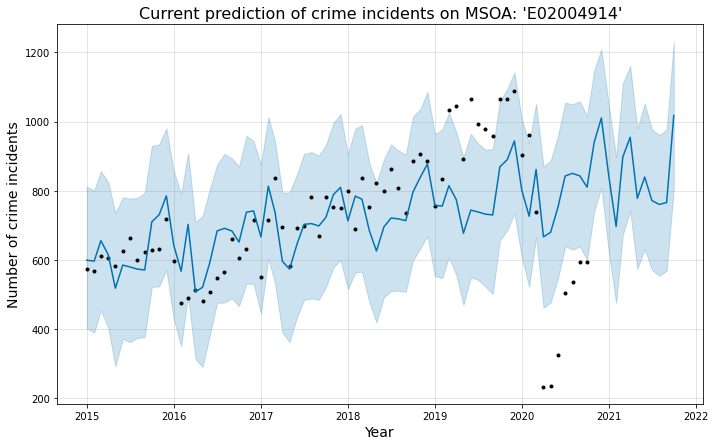

In [ ]:
fig1_m = m.plot(forecast)
ax = fig1_m.gca()
ax.set_title("Current prediction of crime incidents on MSOA: 'E02004914'", size=16)
ax.set_xlabel("Year", size=14)
ax.set_ylabel("Number of crime incidents", size=14);

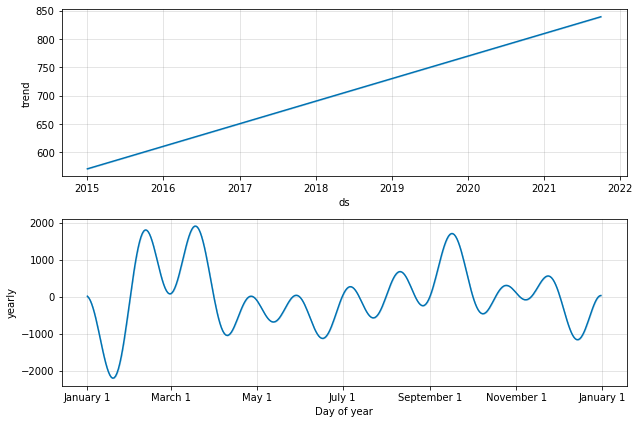

In [ ]:
fig2_m = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:


print (len(train),len(test))

70 12


In [ ]:
# Initial training period.
initial= 30*len(train)
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 30*len(test)
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 30*12
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)
# Performance Metrics of fb_cv
performance_metrics(fb_cv)

ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

In [ ]:
#MAE attempt
i=0
error = []
while i<len(test):
    x = forecast.iloc[i]["trend"]
    y = test.iloc[i]["y"]
    error.append(abs(y-x))
    i += 1
MAE = sum(error)/len(error)
print(MAE)


185.533354166541


In [ ]:
#MSE attempt
i=0
error = []
while i<len(test):
    x = forecast.iloc[i]["trend"]
    y = test.iloc[i]["y"]
    error.append((y-x)**2)
    i += 1
MSE = sum(error)/len(error)
print(MSE)

41269.63760132087


## Hyperparameter tuning

In [ ]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in tq.tqdm(all_params):
    m = Prophet(**params).fit(df2)  # Fit model with given params
    df_cv = cross_validation(m, horizon=61,period 30, initial =70*30, parallel="processes") # add cutoffs?
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

  0%|          | 0/128 [00:00<?, ?it/s]INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2018-04-02 12:00:00 and 2020-10-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7faaad132790>
  1%|          | 1/128 [00:18<39:05, 18.46s/it]INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 6 forecasts with cutoffs between 2018-04-02 12:00:00 and 2020-10-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7faaacb3e550>
  2%|▏         | 2/128 [00:38<40:46, 19.41s/it]INFO:prophet:Disabling weekly seasonality. 

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)
# {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'holidays_prior_scale': 0.01}

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive', 'holidays_prior_scale': 0.01}


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40789b9a-1c62-45b9-9d9c-b1a39ebe3dfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>